In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy import stats
plt.style.use('ggplot')

In [ ]:
df=pd.read_csv("/content/abalone.csv")

In [ ]:
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [ ]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [ ]:
df=df.rename(columns={'Whole weight': 'Whole_weight', 'Shucked weight': 'Shucked_weight', 'Viscera weight': 'Viscera_weight','Shell weight':'Shell_weight'})

Here we observe that minimum value of height is 0 , which ain't possible , maybe data is not accurate for these columns .

In [ ]:
df[df['Height']==0]

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera_weight  Shell_weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6

Here we observe that there are two rows where the height is 0, which is not practically feasible. However, we also examined the whole weight column and found that its values are relatively low, below the first quantile. Therefore, it might not be an error, and we decided to retain that column.

There aren't any null or missing values in this data.

In [ ]:
df.isnull().sum() #no missing values

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

The dependent variable Rings is included in the dataset. It was measured as the number of rings observed after cutting and examining an abalone. Although it does not denote the age of a given abalone directly, it determines it more-or-less perfectly. The age of an abalone equals Rings + 1.5 . Since this relationship holds reliably, Rings will be considered as the dependent variable. The number of rings measured in the data ranges from 1 to 29 and most of the abalone have between 5 and 15 rings. The distribution is slightly positively skewed as well but this does not pose any specific problems for the further analysis. (see plot below)


Also from we see that there are four different measure of weight i.e. Whole_weight, Shucked_weight, Viscera_weight and Shell.weight. Whole_weight is linear function of other weight predictors with Unknown mass of water/blood lost from shucking process.

In [ ]:
df['Weight_diff']=df['Whole_weight']-(df['Shucked_weight']+df['Shell_weight']+df['Viscera_weight'])

Our whole weight is sum of all other weight but still there our some variation in whole weight maybe due to water/blood test . Therby we added a new column named weight_diff , which is basically whole_weight -sum of all other weights. We then observed some negative values in this plot and hence plotted an histogram on that values


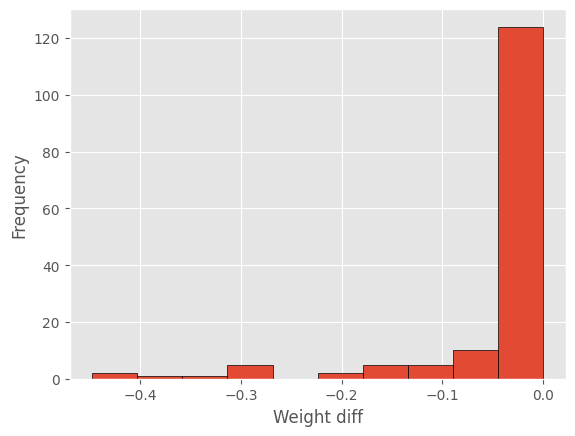

In [ ]:
df[df['Weight_diff']<0]['Weight_diff'].plot(kind='hist',edgecolor='black')
plt.xlabel('Weight diff')
plt.ylabel('Frequency')
plt.show()

In [ ]:

df[df['Weight_diff']<0].shape

(155, 10)

There are in total 155 rows having negative weight diff, However we observed 10 out of them and reached to a conclusion that the values in other columns are correct , we dont know maybe it might be a data entry error , So we decided to keep these values for further prediction.

ANALYSIS ON SEX COLUMN

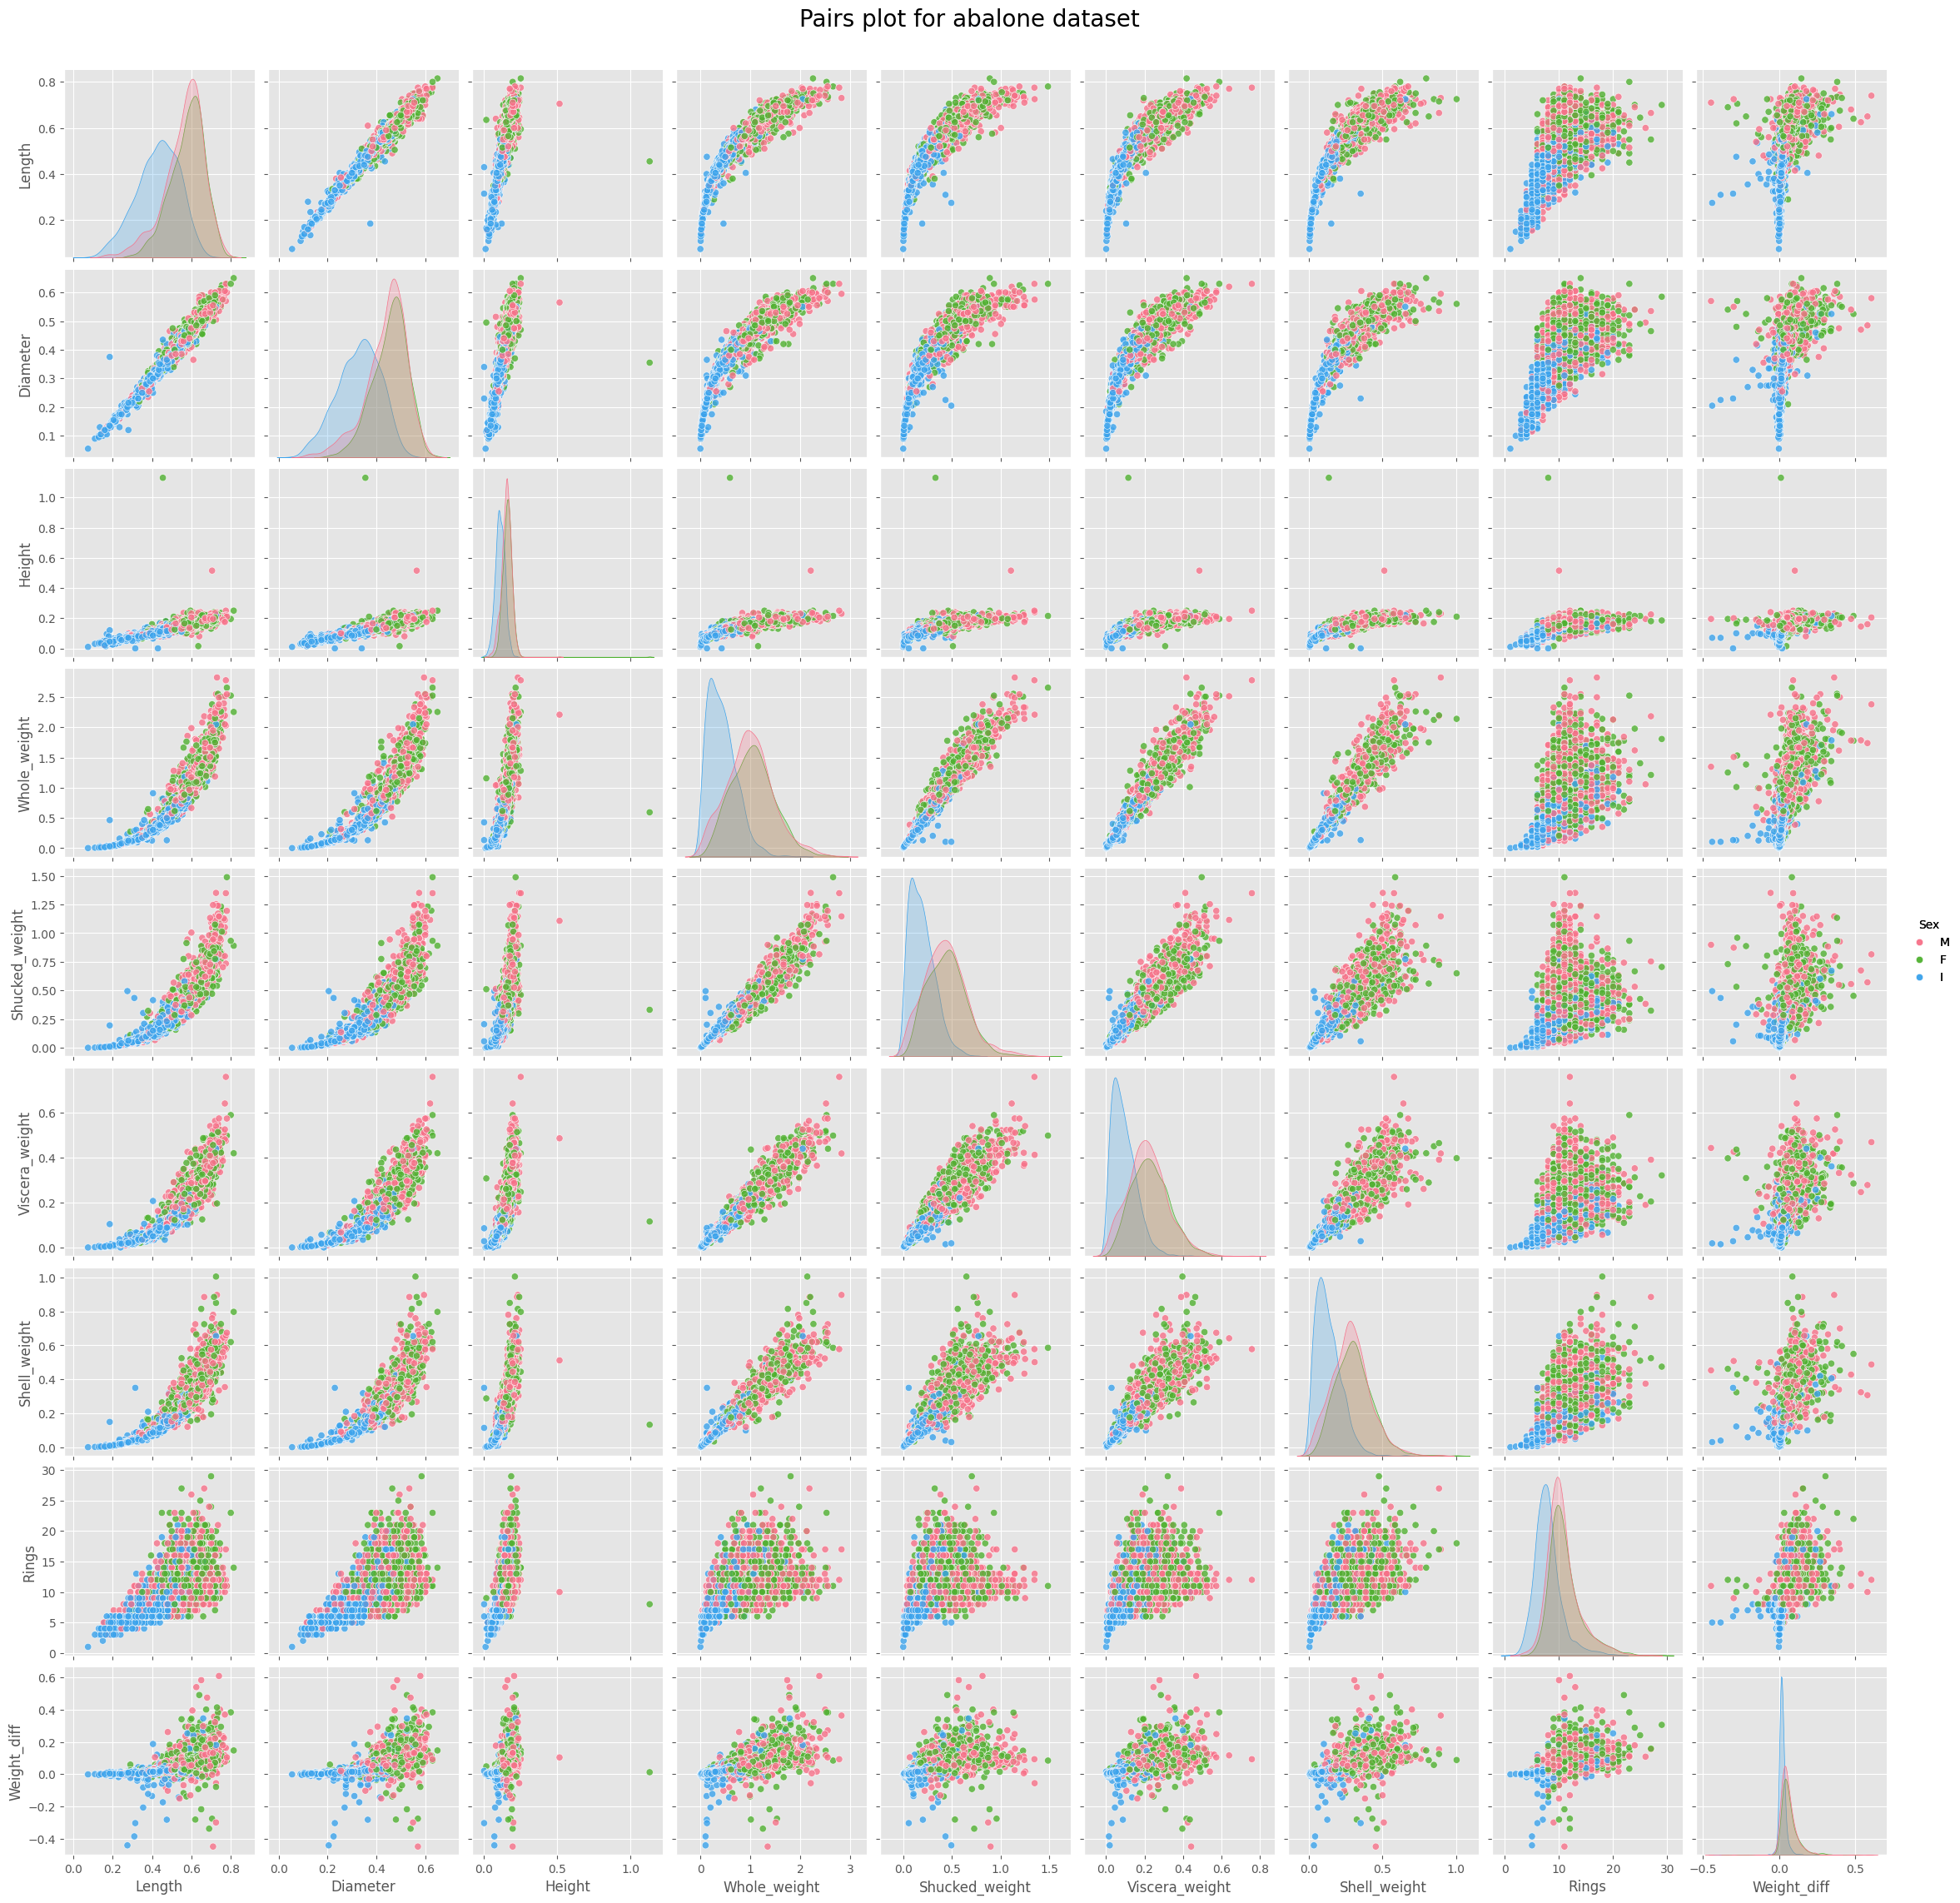

In [ ]:

pairplot = sns.pairplot(df, hue='Sex', diag_kind='kde',palette='husl', plot_kws={'alpha':0.8})
plt.suptitle("Pairs plot for abalone dataset", y=1.02, size=20)
pairplot.add_legend()
plt.show()


We then observed the sex column , and had a prediction that the adults male and female dont vary much in physical appearnaces like height, shellweight but these both vary drastically from the infants column. The median value of infants column is however much lower than the both.So as aresult we decided to split the Sex column on the basis whether the abalone is an infant or not.

<ipython-input-16-2658c20ffe62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='viridis')


<Axes: xlabel='Sex', ylabel='count'>

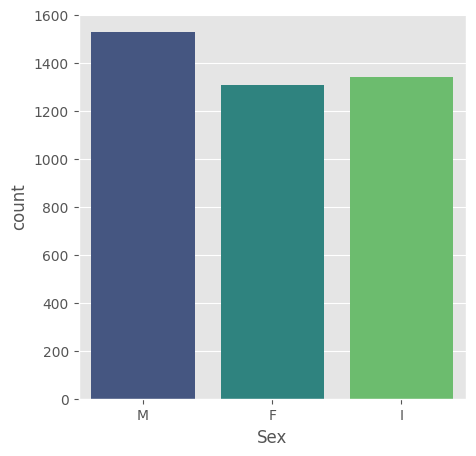

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=df, palette='viridis')

In [ ]:
df['Sex']=np.where(df['Sex']=='I','I','NI')


Label Encoding the sex column

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Sex'] = lab.fit_transform(df['Sex'])
df.head()
for i, category in enumerate(lab.classes_):
    print(f"{category} -> {lab.transform([category])[0]}")

I -> 0
NI -> 1


UNIVARIATE ANALYSIS


The Height column exhibits significant positive skewness and includes multiple outliers, rendering statistical tests like F-statistics and t-statistics unreliable without transformation. Despite the QQ plot suggesting a high degree of normal distribution, the presence of outliers influences the skewness calculation. Skewness, sensitive to outliers, tends to be affected by them, whereas KDE plots smooth out the distribution, potentially masking outlier impacts.

Conversely, Length and Diameter columns display moderate left-skewness, indicating slight asymmetry. Columns such as Whole weight, Shucked weight, Shell weight, and Viscera weight are moderately right-skewed, indicating deviations from normality.







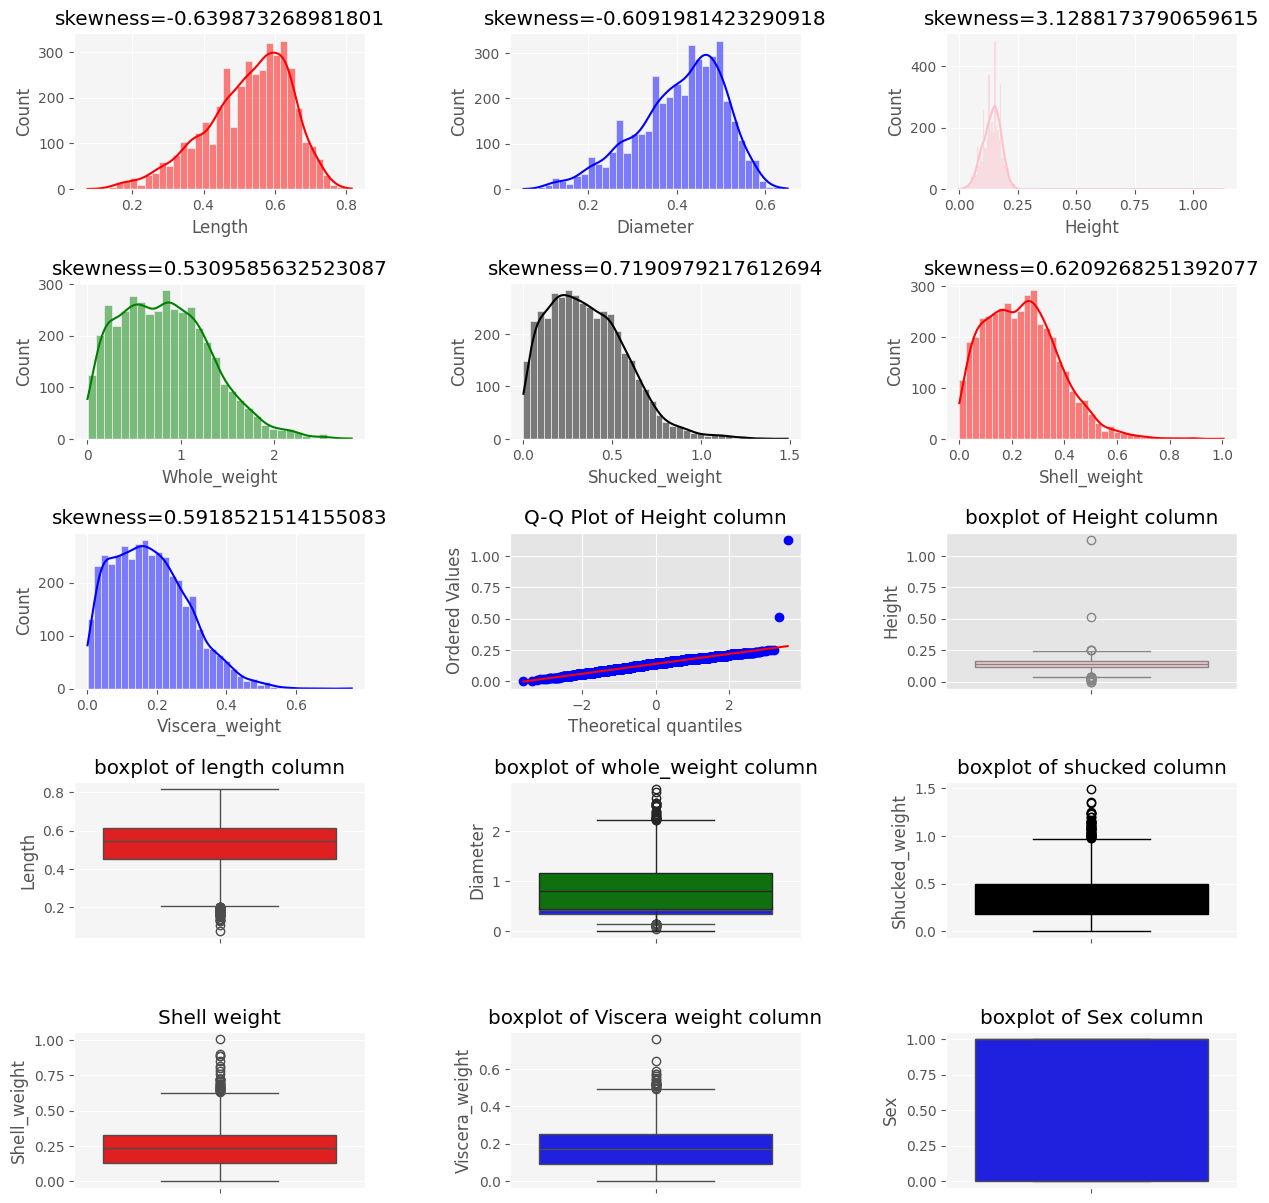

In [ ]:
fig,axs=plt.subplots(5,3,figsize=(15,15))
plt.subplots_adjust(hspace=0.6, wspace=0.5)

sns.histplot(df['Length'],color='red',kde=True,ax=axs[0,0])
axs[0,0].set_title('skewness={}'.format(df['Length'].skew()))
axs[0,0].set_facecolor('#f5f5f6')

sns.histplot(df['Diameter'],color='blue',kde=True,ax=axs[0,1])
axs[0,1].set_title('skewness={}'.format(df['Diameter'].skew()))
axs[0,1].set_facecolor('#f5f5f6')

sns.histplot(df['Height'],color='pink',kde=True,ax=axs[0,2])
axs[0,2].set_title('skewness={}'.format(df['Height'].skew()))
axs[0,2].set_facecolor('#f5f5f6')

sns.histplot(df['Whole_weight'],color='green',kde=True,ax=axs[1,0])
axs[1,0].set_title('skewness={}'.format(df['Whole_weight'].skew()))
axs[1,0].set_facecolor('#f5f5f6')

sns.histplot(df['Shucked_weight'],color='black',kde=True,ax=axs[1,1])
axs[1,1].set_title('skewness={}'.format(df['Shucked_weight'].skew()))
axs[1,1].set_facecolor('#f5f5f6')

sns.histplot(df['Shell_weight'],color='red',kde=True,ax=axs[1,2])
axs[1,2].set_title('skewness={}'.format(df['Shell_weight'].skew()))
axs[1,2].set_facecolor('#f5f5f6')

sns.histplot(df['Viscera_weight'],color='blue',kde=True,ax=axs[2,0])
axs[2,0].set_title('skewness={}'.format(df['Viscera_weight'].skew()))
axs[2,0].set_facecolor('#f5f5f6')

sns.boxplot(df['Height'],color='pink',ax=axs[2,2])
axs[2,2].set_title('boxplot of Height column')
axs[1,2].set_facecolor('#f5f5f6')

stats.probplot(df['Height'], dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('Q-Q Plot of Height column')

sns.boxplot(df['Length'],color='red',ax=axs[3,0])
axs[3,0].set_title('boxplot of length column')
axs[3,0].set_facecolor('#f5f5f6')


sns.boxplot(df['Diameter'],color='blue',ax=axs[3,1])
axs[3,1].set_title('boxplot of diameter column')
axs[3,1].set_facecolor('#f5f5f6')


sns.boxplot(df['Whole_weight'],color='green',ax=axs[3,1])
axs[3,1].set_title('boxplot of whole_weight column')
axs[1,2].set_facecolor('#f5f5f6')


sns.boxplot(df['Shucked_weight'],color='black',ax=axs[3,2])
axs[3,2].set_title('boxplot of shucked column')
axs[3,2].set_facecolor('#f5f5f6')

sns.boxplot(df['Shell_weight'],color='red',ax=axs[4,0])
axs[4,0].set_title('Shell weight')
axs[4,0].set_facecolor('#f5f5f6')

sns.boxplot(df['Viscera_weight'],color='blue',ax=axs[4,1])
axs[4,1].set_title('boxplot of Viscera weight column')
axs[4,1].set_facecolor('#f5f5f6')

sns.boxplot(df['Sex'],color='blue',ax=axs[4,2])
axs[4,2].set_title('boxplot of Sex column')
axs[4,2].set_facecolor('#f5f5f6')



RINGS COLUMN

We find that values in our target column range from 1 to 29, with the most frequent value typically aligning with the median or the highest peak in our histogram. For describing central tendency and spread, median and interquartile range (IQR) are preferable to mean and standard deviation. The QQ plot indicates that the data in our target column is moderately normally distributed.








<ipython-input-20-c8f224070b5c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rings'], kde=False,color='blue', bins=range(0, 31, 2))


((array([-3.58906977, -3.35088698, -3.21946454, ...,  3.21946454,
          3.35088698,  3.58906977]),
  array([ 1,  2,  3, ..., 27, 27, 29])),
 (3.112896934191468, 9.933684462532918, 0.9648470373671635))

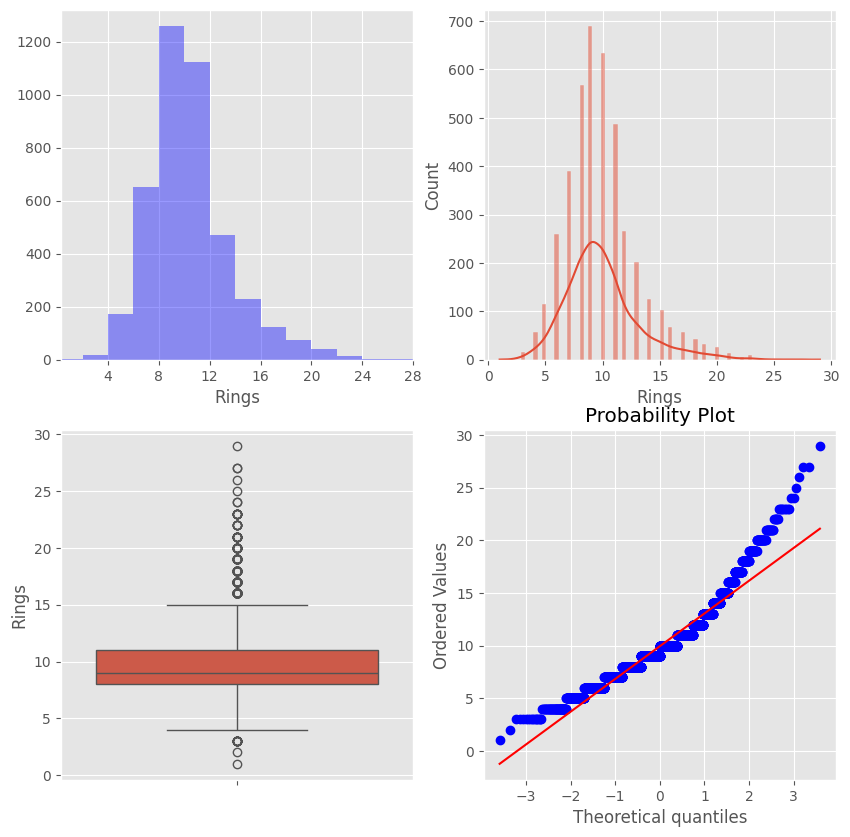

In [ ]:
row=2
col=2
i=0
plt.figure(figsize=(row*5,col*5))

i+=1
plt.subplot(row,col,i)
plt.xticks(range(0,31,4))
plt.xlim(0.30)
sns.distplot(df['Rings'], kde=False,color='blue', bins=range(0, 31, 2))

i+=1
plt.subplot(row,col,i)
sns.histplot(df['Rings'],kde=True)

i+=1
plt.subplot(row,col,i)
sns.boxplot(df['Rings'])

i+=1
plt.subplot(row,col,i)
stats.probplot(df['Rings'], dist="norm", plot=plt)

OUTLIERS REMOVAL

By removing outliers we can see our skewness improved greatly .Now our data is almost Normally distributed to perform various tests.

In [ ]:
def col(df):
    df_remove=df.drop(columns=['Rings','Sex','Weight_diff'])
    columns = df_remove.columns  # Exclude first and last columns
    df_no_outliers = df.copy()  # Make a copy of the original DataFrame

    for column in columns:
        df_no_outliers[column] = pd.to_numeric(df_no_outliers[column], errors='coerce')  # Convert to numeric
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        upper_outliers = (df_no_outliers[column] > upper_bound).sum()
        lower_outliers = (df_no_outliers[column] < lower_bound).sum()

        # Calculate 10% of total rows
        threshold = 0.1 * df_no_outliers.shape[0]

        # Filter based on conditions
        if upper_outliers <= threshold:
            df_no_outliers = df_no_outliers[df_no_outliers[column] <= upper_bound]
        if lower_outliers <= threshold:
            df_no_outliers = df_no_outliers[df_no_outliers[column] >= lower_bound]

    return df_no_outliers

df_no_outliers = col(df)
print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       1   0.455     0.365   0.095        0.5140          0.2245   
1       1   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
4       0   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    1   0.590     0.440   0.135        0.9660          0.4390   
4174    1   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    1   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  Weight_diff  
0             0.1010        0.1500     15       0.0385  
1             0.0485        0

Here we removed about 164 rows that were categorized as outliers .

In [ ]:
print('shape of original dataframe :',df.shape,'shape of dataframe without outliers:',df_no_outliers.shape)

shape of original dataframe : (4177, 10) shape of dataframe without outliers: (4013, 10)


Checking the normality after outliers removal which has drastically enhanced.

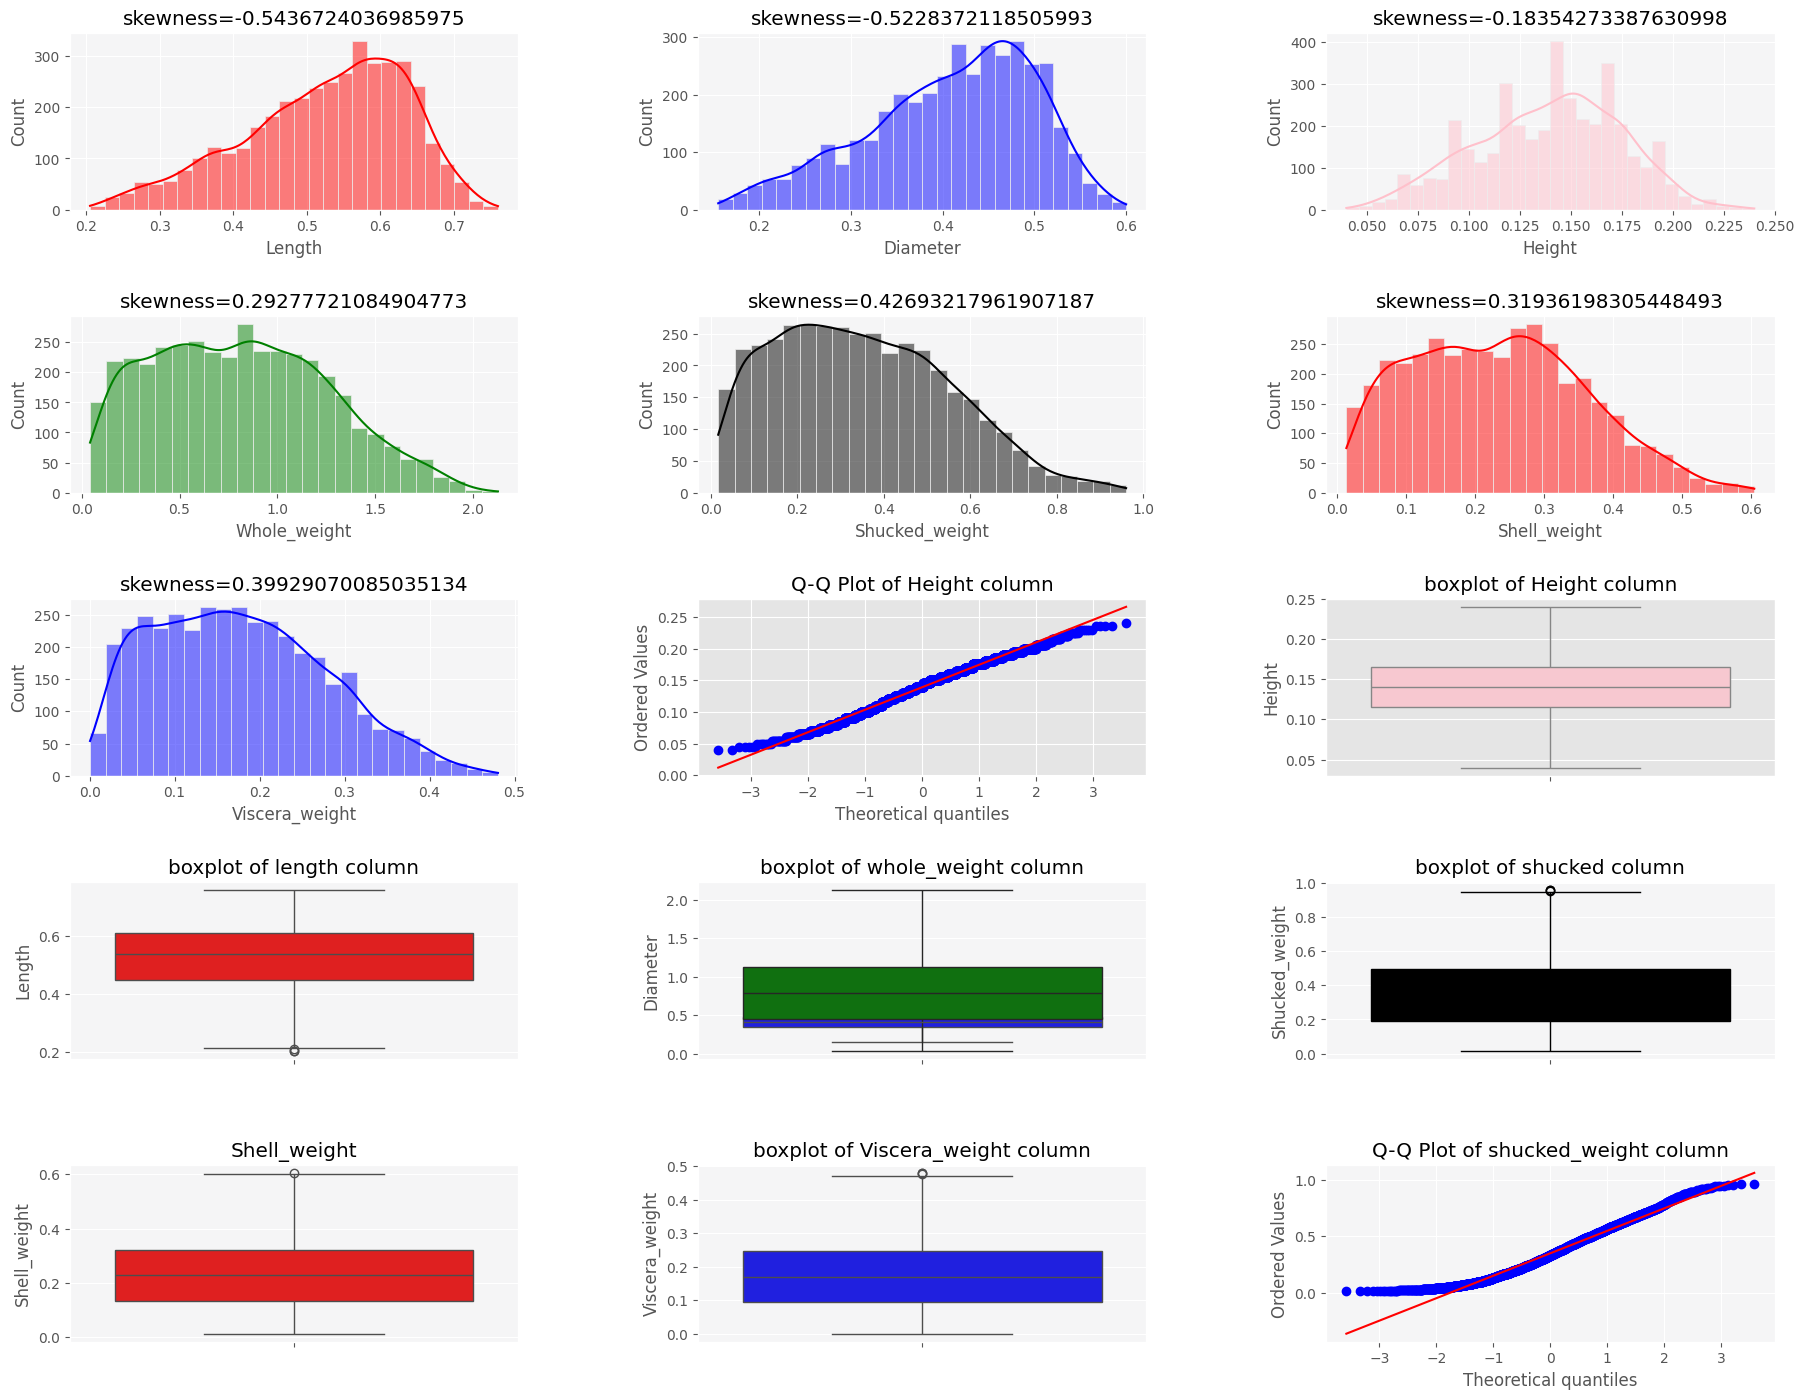

In [ ]:
fig,axs=plt.subplots(5,3,figsize=(22,17))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

sns.histplot(df_no_outliers['Length'],color='red',kde=True,ax=axs[0,0])
axs[0,0].set_title('skewness={}'.format(df_no_outliers['Length'].skew()))
axs[0,0].set_facecolor('#f5f5f6')

sns.histplot(df_no_outliers['Diameter'],color='blue',kde=True,ax=axs[0,1])
axs[0,1].set_title('skewness={}'.format(df_no_outliers['Diameter'].skew()))
axs[0,1].set_facecolor('#f5f5f6')

sns.histplot(df_no_outliers['Height'],color='pink',kde=True,ax=axs[0,2])
axs[0,2].set_title('skewness={}'.format(df_no_outliers['Height'].skew()))
axs[0,2].set_facecolor('#f5f5f6')

sns.histplot(df_no_outliers['Whole_weight'],color='green',kde=True,ax=axs[1,0])
axs[1,0].set_title('skewness={}'.format(df_no_outliers['Whole_weight'].skew()))
axs[1,0].set_facecolor('#f5f5f6')

sns.histplot(df_no_outliers['Shucked_weight'],color='black',kde=True,ax=axs[1,1])
axs[1,1].set_title('skewness={}'.format(df_no_outliers['Shucked_weight'].skew()))
axs[1,1].set_facecolor('#f5f5f6')

sns.histplot(df_no_outliers['Shell_weight'],color='red',kde=True,ax=axs[1,2])
axs[1,2].set_title('skewness={}'.format(df_no_outliers['Shell_weight'].skew()))
axs[1,2].set_facecolor('#f5f5f6')

sns.histplot(df_no_outliers['Viscera_weight'],color='blue',kde=True,ax=axs[2,0])
axs[2,0].set_title('skewness={}'.format(df_no_outliers['Viscera_weight'].skew()))
axs[2,0].set_facecolor('#f5f5f6')

sns.boxplot(df_no_outliers['Height'],color='pink',ax=axs[2,2])
axs[2,2].set_title('boxplot of Height column')
axs[1,2].set_facecolor('#f5f5f6')

stats.probplot(df_no_outliers['Height'], dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('Q-Q Plot of Height column')

sns.boxplot(df_no_outliers['Length'],color='red',ax=axs[3,0])
axs[3,0].set_title('boxplot of length column')
axs[3,0].set_facecolor('#f5f5f6')


sns.boxplot(df_no_outliers['Diameter'],color='blue',ax=axs[3,1])
axs[3,1].set_title('boxplot of diameter column')
axs[3,1].set_facecolor('#f5f5f6')


sns.boxplot(df_no_outliers['Whole_weight'],color='green',ax=axs[3,1])
axs[3,1].set_title('boxplot of whole_weight column')
axs[1,2].set_facecolor('#f5f5f6')


sns.boxplot(df_no_outliers['Shucked_weight'],color='black',ax=axs[3,2])
axs[3,2].set_title('boxplot of shucked column')
axs[3,2].set_facecolor('#f5f5f6')

sns.boxplot(df_no_outliers['Shell_weight'],color='red',ax=axs[4,0])
axs[4,0].set_title('Shell_weight')
axs[4,0].set_facecolor('#f5f5f6')

sns.boxplot(df_no_outliers['Viscera_weight'],color='blue',ax=axs[4,1])
axs[4,1].set_title('boxplot of Viscera_weight column')
axs[4,1].set_facecolor('#f5f5f6')

stats.probplot(df_no_outliers['Shucked_weight'], dist="norm", plot=axs[4,2])
axs[4, 2].set_title('Q-Q Plot of shucked_weight column')
axs[4,2].set_facecolor('#f5f5f6')



MULTIVARIATE AND BIVARIATE ANANLYSIS


From the heatmap, it's evident that height and shell weight show the strongest correlations with our target variable, Rings.
Length, Diameter, and Height show very strong correlations with each other (values close to 0.99-0.9). This indicates that as one dimension of the abalone increases, the others tend to increase proportionally.
Whole weight, Shucked weight, Viscera weight, and Shell weight also exhibit strong inter-correlations (values around 0.97-0.9). These weights are likely highly interdependent as they are different measures of the abalone's mass.
Shell weight has the highest correlation with 'Rings' at 0.61, suggesting that shell weight is a good predictor of the abalone's age among infants.
Other variables like Height, Length, Diameter, and Whole weight also show moderate correlations with 'Rings' (values between 0.52-0.58), indicating these dimensions and weights also increase as the abalone ages, but not as strongly as shell weight.









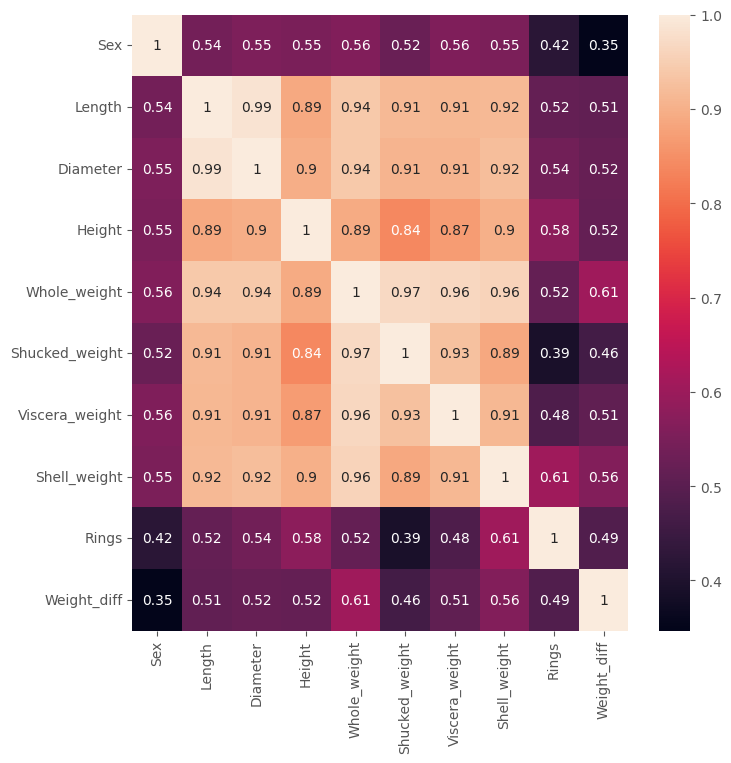

In [ ]:
plt.figure(figsize=(8,8))
corr = df_no_outliers.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 500x300 with 0 Axes>

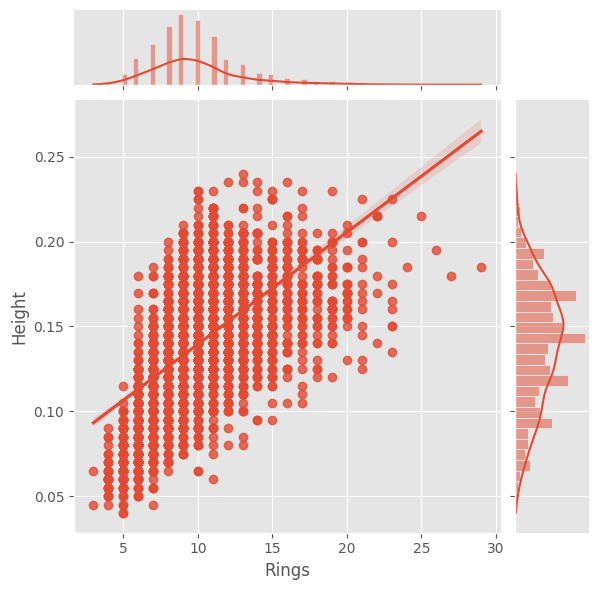

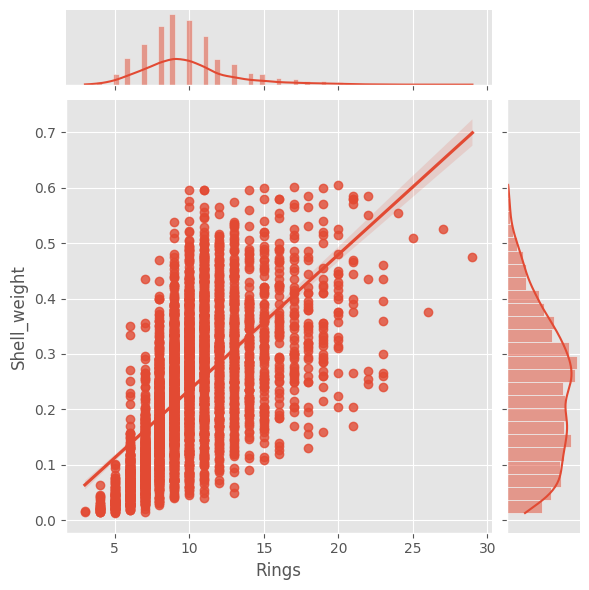

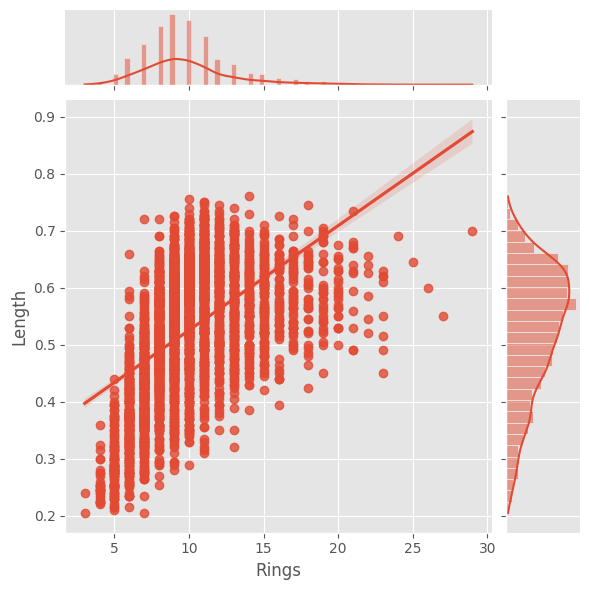

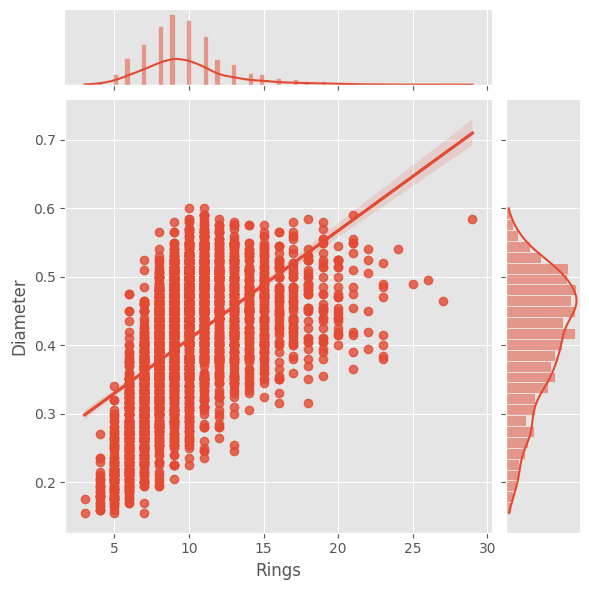

In [ ]:
plt.figure(figsize=(5,3))

_ = sns.jointplot(data=df_no_outliers, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=df_no_outliers, x='Rings', y='Shell_weight', kind='reg')
_ = sns.jointplot(data=df_no_outliers, x='Rings', y='Length', kind='reg')
_ = sns.jointplot(data=df_no_outliers, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=df_no_outliers, x='Rings', y='Whole_weight', kind='reg')

The scatter plot shows a positive linear relationship between Rings and other columns. As the number of rings (which indicates the age of the abalone) increases, the whole weight , height , diameter,length also tends to increase.The Rings histogram indicates that most abalones have between 6 and 12 rings.

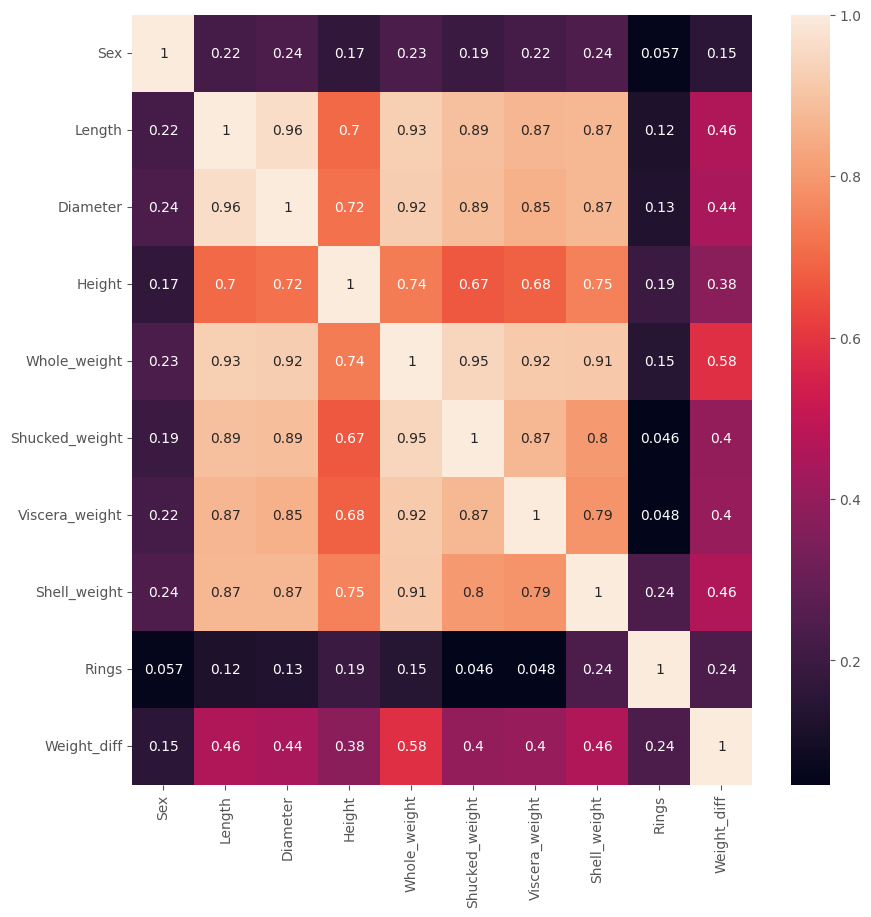

In [ ]:
df_rings=df_no_outliers[df_no_outliers['Rings']>12]
plt.figure(figsize=(10, 10))
corr = df_rings.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 2000x500 with 0 Axes>

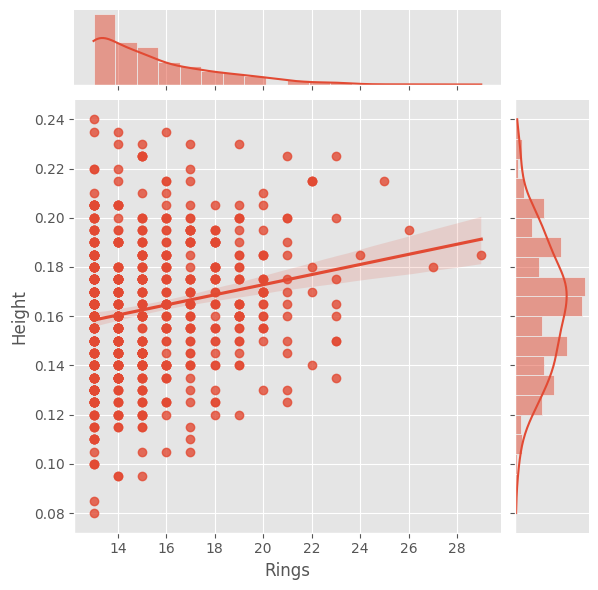

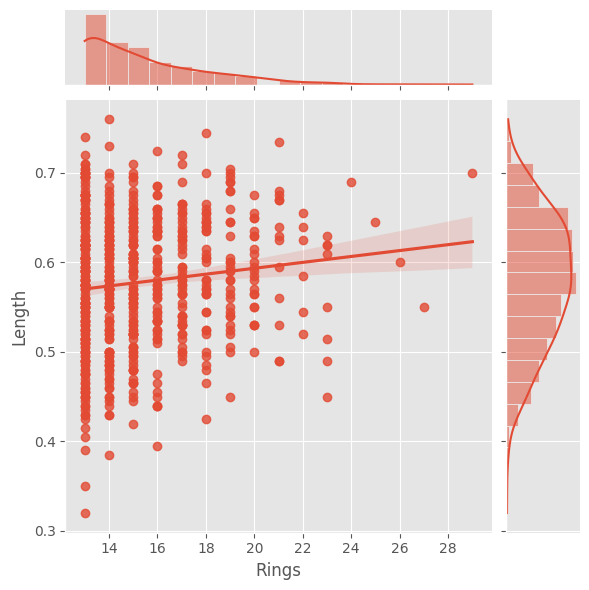

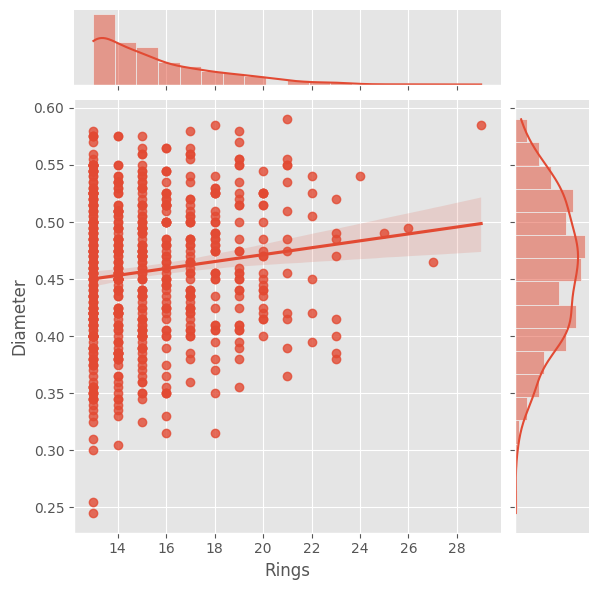

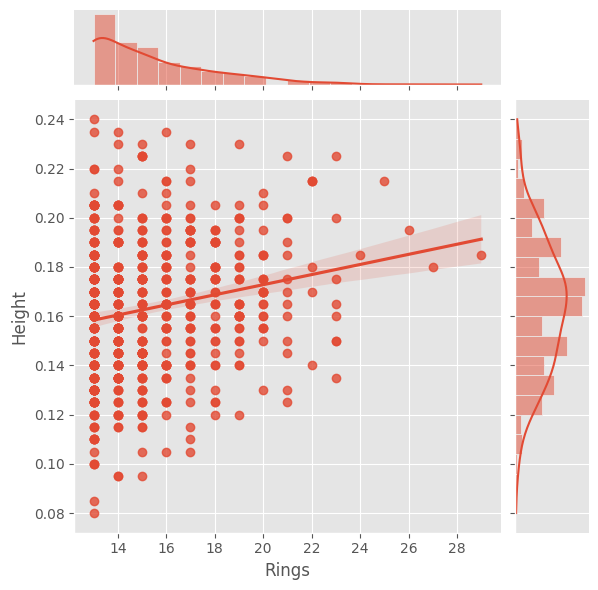

In [ ]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df_rings, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=df_rings, x='Rings', y='Length', kind='reg')
_ = sns.jointplot(data=df_rings, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=df_rings, x='Rings', y='Shell_weight', kind='reg')
_ = sns.jointplot(data=df_rings, x='Rings', y='Height', kind='reg')

Abalons having ring size greater than 12 rings , their height , length , diameter , shell weight , wholeweight doesnt inc that drastically comapred to when they were young rings< 10 where their growth curve increased drastically,symbolifying when they reach upto certain age their parameter doesnt grow anymore

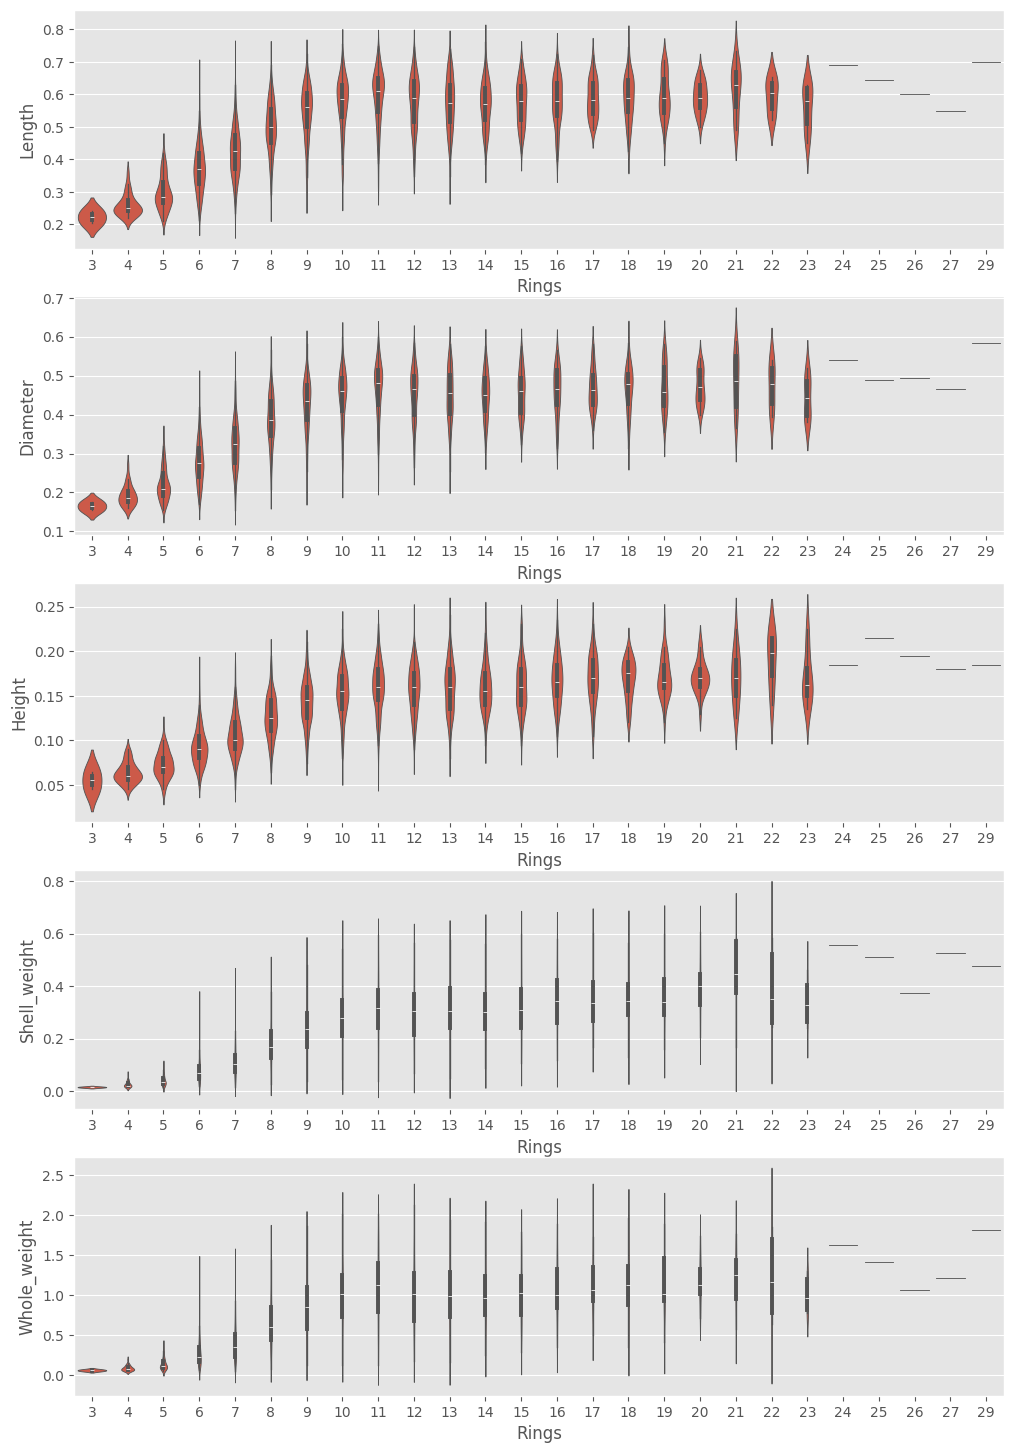

In [ ]:
plt.figure(figsize=(12,18))

colors = sns.color_palette()

rows = 5
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=df_no_outliers, x='Rings', y='Length')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=df_no_outliers, x='Rings', y='Diameter')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=df_no_outliers, x='Rings', y='Height')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=df_no_outliers, x='Rings', y='Shell_weight')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=df_no_outliers, x='Rings', y='Whole_weight')



From the heatmap, we observed a high correlation between whole weight and other weights, likely because the whole weight is essentially a sum of the other weights. Additionally, there is a strong correlation between length, and diameter. To confirm these observations and check for multicollinearity between these columns, we decided to calculate the Variance Inflation Factor (VIF).








In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=df_no_outliers[['Whole_weight','Shell_weight','Viscera_weight','Shucked_weight']]
X=add_constant(X)
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['Vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
print(vif_data)

         features        Vif
0           const   4.522077
1    Whole_weight  99.333664
2    Shell_weight  19.414635
3  Viscera_weight  15.719341
4  Shucked_weight  25.199527


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=df_no_outliers[['Height','Diameter','Length']]
X=add_constant(X)
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['Vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
print(vif_data)


   features        Vif
0     const  25.482345
1    Height   5.126225
2  Diameter  37.149714
3    Length  35.028063


In [ ]:
!pip install pingouin
import pingouin as pg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
df_no=df_no_outliers.drop(columns=['Sex','Weight_diff'])
all_columns = df_no.columns.tolist()

for i in range(len(all_columns)):
    for j in range(i + 1, len(all_columns)):
        col1 = all_columns[i]
        col2 = all_columns[j]
        covar_cols = [col for col in all_columns if col != col1 and col != col2]
        partial_corr = pg.partial_corr(data=df_no, x=col1, y=col2, covar=covar_cols)
        print(f"Partial correlation between {col1} and {col2} controlling for {covar_cols}:")
        print(partial_corr)
        print("\n")


Partial correlation between Length and Diameter controlling for ['Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']:
            n         r         CI95%  p-val
pearson  4013  0.857088  [0.85, 0.87]    0.0


Partial correlation between Length and Height controlling for ['Diameter', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']:
            n         r         CI95%     p-val
pearson  4013  0.040168  [0.01, 0.07]  0.010994


Partial correlation between Length and Whole_weight controlling for ['Diameter', 'Height', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']:
            n       r          CI95%    p-val
pearson  4013  0.0035  [-0.03, 0.03]  0.82472


Partial correlation between Length and Shucked_weight controlling for ['Diameter', 'Height', 'Whole_weight', 'Viscera_weight', 'Shell_weight', 'Rings']:
            n         r         CI95%         p-val
pearson  4013  0.081636  [0.05, 0.11]  2.283689e-07


After analysing the values of VIF and partial coefficient we decided to drop the column length and viscera weight and we see a huge dec in vif value .

In [ ]:
df_dropped_columns=df_no_outliers.drop(columns=['Diameter','Whole_weight'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=df_dropped_columns[['Length','Shell_weight','Height','Shucked_weight','Viscera_weight']]
X=add_constant(X)
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['Vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
print(vif_data)


         features        Vif
0           const  93.783813
1          Length  10.111848
2    Shell_weight   9.285755
3          Height   6.158257
4  Shucked_weight   8.887176
5  Viscera_weight  10.307723


In [ ]:
df_no=df_dropped_columns.drop(columns=['Sex'])
all_columns = df_no.columns.tolist()

for i in range(len(all_columns)):
    for j in range(i + 1, len(all_columns)):
        col1 = all_columns[i]
        col2 = all_columns[j]
        covar_cols = [col for col in all_columns if col != col1 and col != col2]
        partial_corr = pg.partial_corr(data=df_no, x=col1, y=col2, covar=covar_cols)
        print(f"Partial correlation between {col1} and {col2} controlling for {covar_cols}:")
        print(partial_corr)
        print("\n")


Partial correlation between Length and Height controlling for ['Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings', 'Weight_diff']:
            n         r         CI95%         p-val
pearson  4013  0.287691  [0.26, 0.32]  3.075305e-77


Partial correlation between Length and Shucked_weight controlling for ['Height', 'Viscera_weight', 'Shell_weight', 'Rings', 'Weight_diff']:
            n         r        CI95%          p-val
pearson  4013  0.371649  [0.34, 0.4]  1.684523e-131


Partial correlation between Length and Viscera_weight controlling for ['Height', 'Shucked_weight', 'Shell_weight', 'Rings', 'Weight_diff']:
            n        r         CI95%         p-val
pearson  4013  0.14429  [0.11, 0.17]  4.309024e-20


Partial correlation between Length and Shell_weight controlling for ['Height', 'Shucked_weight', 'Viscera_weight', 'Rings', 'Weight_diff']:
            n         r         CI95%         p-val
pearson  4013  0.219168  [0.19, 0.25]  8.623920e-45


Partial correlatio

The violin plot indicates that abalones reach their maximum length, diameter, and shell weight at around 10-11 rings, corresponding to an age of approximately 11.5-13.5 years. The maximum height is achieved at about 13 rings, which is roughly 15.5 years old. The highest whole weight is observed when abalones have around 12-13 rings, translating to an age of about 13.5-14.5 years. Most abalones have fewer than 10 rings and show significant growth up to that point.

SEX COLUMN MULTIVARIATE ANALYSIS

Using the 'Sex' column to examine how being male or female affects height, shell weight, and the target variable 'Rings' using lmplot. The boxplot of the 'Sex' column shows that the median or mean value for infants is notably lower compared to males and females. We are creating facet plots to explore whether the values in the 'Sex' column influence height, shell weight, and the number of rings.

In [ ]:
g = sns.FacetGrid(df_no_outliers, col='Sex', margin_titles=True)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 2000x500 with 0 Axes>

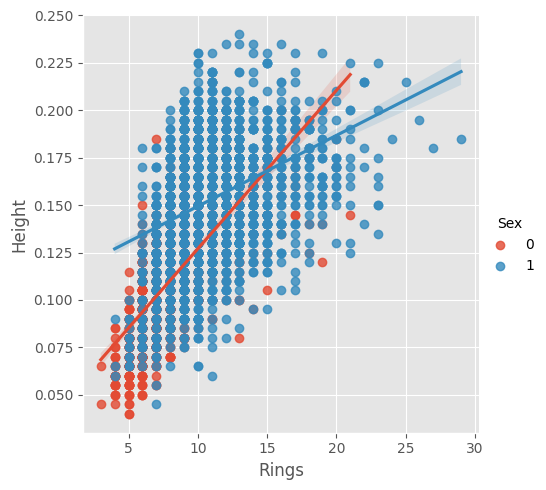

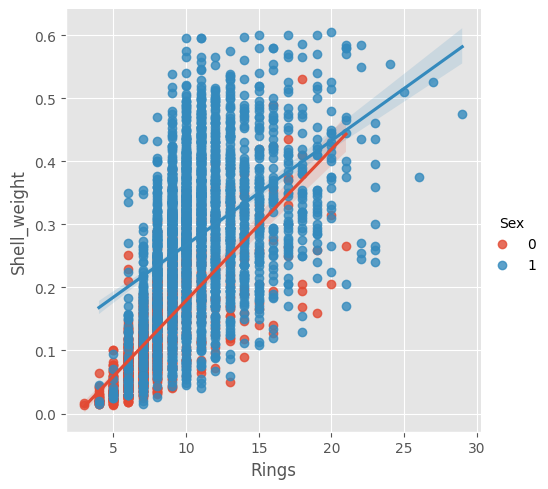

In [ ]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=df_dropped_columns, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=df_dropped_columns, x='Rings', y='Shell_weight', hue='Sex', fit_reg=True)

OVERALL ANALYSIS OF DATASET:
Based on our observations of the correlation between the target attribute Rings and the independent variables, we can infer the feasibility of building a predictive model based on these attributes. The weight of Abalones shows a proportional variation with their sizes. There are no significant differences in size, weight, and number of rings between male and female abalones. Infant Abalones exhibit lower mean values for size, weight, and number of rings compared to adults. Furthermore, the weight and height of abalones vary according to age until adulthood, after which these measurements stabilize. Beyond 16.5 years (15 rings), there appears to be no correlation between age and these physical measurements.








In [ ]:

from sklearn.model_selection import train_test_split
X_train=df_no_outliers.iloc[:,1:-2]
Y_train=df_no_outliers.iloc[:,-2]
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
a_1=r2_score(y_test,y_pred)
b_1=mean_squared_error(y_test,y_pred)
print(a_1,b_1)

0.5414952781463793 4.534541296032304


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001)
lasso.fit(X_train_scaled,y_train)
y_pred_3 = lasso.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
print(mse,r2)

4.533637134482087 0.5415867013605544


In [ ]:
import statsmodels.api as sm
X=df_no_outliers[['Sex','Shell_weight','Viscera_weight','Diameter','Length','Whole_weight','Height','Shucked_weight']]
X=sm.add_constant(X)
Y=df_no_outliers['Rings']
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     543.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:05:33   Log-Likelihood:                -8781.2
No. Observations:                4013   AIC:                         1.758e+04
Df Residuals:                    4004   BIC:                         1.764e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3762      0.331     10.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 2.1296550004998203


In [ ]:
from scipy.stats import boxcox
y_boxcox, lambda_ = boxcox(Y_train)
X = df_no_outliers[['Sex', 'Shell_weight', 'Viscera_weight', 'Length', 'Whole_weight', 'Height', 'Shucked_weight','Weight_diff']]
X = sm.add_constant(X)
model_boxcox = sm.OLS(y_boxcox, X).fit()

print(model_boxcox.summary())







                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     764.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:05:38   Log-Likelihood:                 1598.9
No. Observations:                4013   AIC:                            -3182.
Df Residuals:                    4005   BIC:                            -3131.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2889      0.025     51.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Assuming your dataset is loaded into a DataFrame named 'df_no_outliers'
df = df_no_outliers

# Define the formula for the regression model
formula = 'Rings ~ Sex + Length + Diameter + Height + Whole_weight + Shucked_weight + Viscera_weight + Shell_weight + Weight_diff'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)


                      sum_sq      df           F         PR(>F)
Sex               388.162236     1.0   83.153929   1.173973e-19
Length              6.196072     1.0    1.327352   2.493457e-01
Diameter           65.528831     1.0   14.037893   1.816870e-04
Height            393.397310     1.0   84.275412   6.734958e-20
Whole_weight      742.565341     1.0  159.075820   8.561301e-36
Shucked_weight   3025.480045     1.0  648.132485  1.206885e-132
Viscera_weight    144.104174     1.0   30.870670   2.937407e-08
Shell_weight     1874.415585     1.0  401.546073   3.352394e-85
Weight_diff       411.978053     1.0   88.255865   9.389222e-21
Residual        18690.657202  4004.0         NaN            NaN


In [ ]:
df_exhaustive=df_no_outliers.drop(columns=['Length','Diameter'])

In [ ]:
df_no_outliers

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       1   0.455     0.365   0.095        0.5140          0.2245   
1       1   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
4       0   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    1   0.590     0.440   0.135        0.9660          0.4390   
4174    1   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    1   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  Weight_diff  
0             0.1010        0.1500     15       0.0385  
1             0.0485        0.0700      7       0.0075  
2             0.1415        0.2100      9       0.0690  
3             0.1140        0.1550     10       0.0315  
4             0.0395        0.0550      7       0.0210  
...              ...           ...    ...          ...  
4172          0.2390        0.2490     11       0.0290  
4173          0.2145        0.2605     10       0.0520  
4174          0.2875        0.3080      9       0.0550  
4175          0.2610        0.2960     10       0.0065  
4176          0.3765        0.4950     12       0.1315  

[4013 rows x 10 columns]

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

X = df_no_outliers.drop(columns='Rings')
y = df_no_outliers['Rings']

# Define the model
model = LinearRegression()

# Perform exhaustive feature selection
efs = ExhaustiveFeatureSelector(model,
                                min_features=4,
                                max_features=7,  # Adjust based on computational limits
                                scoring='r2',
                                print_progress=True,
                                cv=5)

efs = efs.fit(X, y)

# Get the selected features
selected_features = list(efs.best_feature_names_)
print("Selected Features:", selected_features)


Features: 372/372

Selected Features: ['Sex', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Weight_diff']


In [ ]:
X_train=df_exhaustive.iloc[:,1:-2]
Y_train=df_exhaustive.iloc[:,-2]
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:

lr1=LinearRegression()
lr1.fit(X_train,y_train)
y_pred=lr.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
a_1=r2_score(y_test,y_pred)
b_1=mean_squared_error(y_test,y_pred)
print(a_1,b_1)

0.5414952781463793 4.534541296032304


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001)
lasso.fit(X_train_scaled,y_train)
y_pred_3 = lasso.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
print(mse,r2)

4.533637134482087 0.5415867013605544


In [ ]:
import statsmodels.api as sm
X=df_exhaustive[['Sex','Shell_weight','Viscera_weight','Whole_weight','Height','Shucked_weight','Weight_diff']]
X=sm.add_constant(X)
Y=df_no_outliers['Rings']
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     714.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:                -8796.3
No. Observations:                4013   AIC:                         1.761e+04
Df Residuals:                    4006   BIC:                         1.765e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4836      0.194     23.

In [ ]:
X_train_2=df_dropped_columns.iloc[:,1:-2]
Y_train_2=df_dropped_columns.iloc[:,-2]
X_train_d,X_test_d,y_train_d,y_test_d=train_test_split(X_train_2,Y_train_2,test_size=0.2,random_state=42)
sd=StandardScaler()
X_train_scaled_d=sd.fit_transform(X_train_d)
X_test_scaled_d=sd.transform(X_test_d)



In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled_d,y_train_d)
y_pred_d=lr.predict(X_test_scaled_d)
from sklearn.metrics import r2_score,mean_squared_error
a_2=r2_score(y_test_d,y_pred_d)
b_2=mean_squared_error(y_test_d,y_pred_d)
print(b_2,a_2)


4.757283677712238 0.5189729485236383


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train_scaled_d,y_train_d)
y_predicted= lasso.predict(X_test_scaled_d)
r2 = r2_score(y_test_d, y_predicted)
mse = mean_squared_error(y_test_d, y_predicted)
print(mse,r2)

4.740724024214443 0.5206473580890869


In [ ]:
import statsmodels.api as sm
X=df_dropped_columns[['Sex','Shell_weight','Length','Height','Shucked_weight','Viscera_weight']]
X=sm.add_constant(X)
Y=df_dropped_columns['Rings']
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     670.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        06:32:39   Log-Likelihood:                -8861.3
No. Observations:                4013   AIC:                         1.774e+04
Df Residuals:                    4006   BIC:                         1.778e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1568      0.337      9.

In [ ]:
#nolinear - log transformations
#normality-qqplot omnibus jarque bera
#homoscadesity-
#multi-



In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled_d, y_train_d)
y_predict = ridge.predict(X_test_scaled_d)

# Calculate RMSE
rmse = mean_squared_error(y_test_d, y_predict, squared=False)
print(f'RMSE: {rmse}')
r2_score(y_test_d,y_predict)

RMSE: 2.1810098918183374


0.5190214355760102

In [ ]:
from scipy.stats import boxcox
y_boxcox, lambda_ = boxcox(Y_train_2)
X = df_dropped_columns[['Sex', 'Shell_weight', 'Viscera_weight', 'Height', 'Shucked_weight','Weight_diff']]
X = sm.add_constant(X)
model_boxcox = sm.OLS(y_boxcox, X).fit()

print(model_boxcox.summary())







                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     837.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        06:33:53   Log-Likelihood:                 1527.4
No. Observations:                4013   AIC:                            -3041.
Df Residuals:                    4006   BIC:                            -2997.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5324      0.015    103.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Assuming your dataset is loaded into a DataFrame named 'df_no_outliers'
df = df_dropped_columns

# Define the formula for the regression model
formula = 'Rings ~ Sex + Length  + Height + Shucked_weight + Viscera_weight + Shell_weight + Weight_diff'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)


                      sum_sq      df           F         PR(>F)
Sex               423.948425     1.0   90.525517   3.056415e-21
Length             75.697865     1.0   16.163731   5.916513e-05
Height            443.057594     1.0   94.605890   4.074044e-22
Shucked_weight   2353.831270     1.0  502.612537  5.749545e-105
Viscera_weight     32.417273     1.0    6.922046   8.546572e-03
Shell_weight     2644.911281     1.0  564.766721  6.723723e-117
Weight_diff       696.183270     1.0  148.655702   1.334581e-33
Residual        18756.186033  4005.0         NaN            NaN


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df_dropped_columns.drop(columns='Rings')
y = df_dropped_columns['Rings']

# Create a linear regression model
model = LinearRegression()

# Perform RFE
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features to select
rfe = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Length', 'Height', 'Shucked_weight', 'Shell_weight', 'Weight_diff'], dtype='object')
